# Use with PyGMT
Here we demonstrate how to use the figure output from PolarToolkit with normal PyGMT commands. PyGMT offers much more flexiblity than PolarToolkit, so if you want to change lots of details of a figure, we recommend using this approach.

In [1]:
from polartoolkit import fetch, maps

Fetch the datasets, bedmap2 surface topography and LIMA satellite imagery

In [2]:
imagery = fetch.imagery()

surface = fetch.bedmap2(layer="surface")

grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from 150000 to 149928.342238
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from 550000 to 550025.85147
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from -1350000 to -1350225.03799
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from -1100000 to -1099905.03746
gmtset [WARNING]: Representation of font type not recognized. Using default.


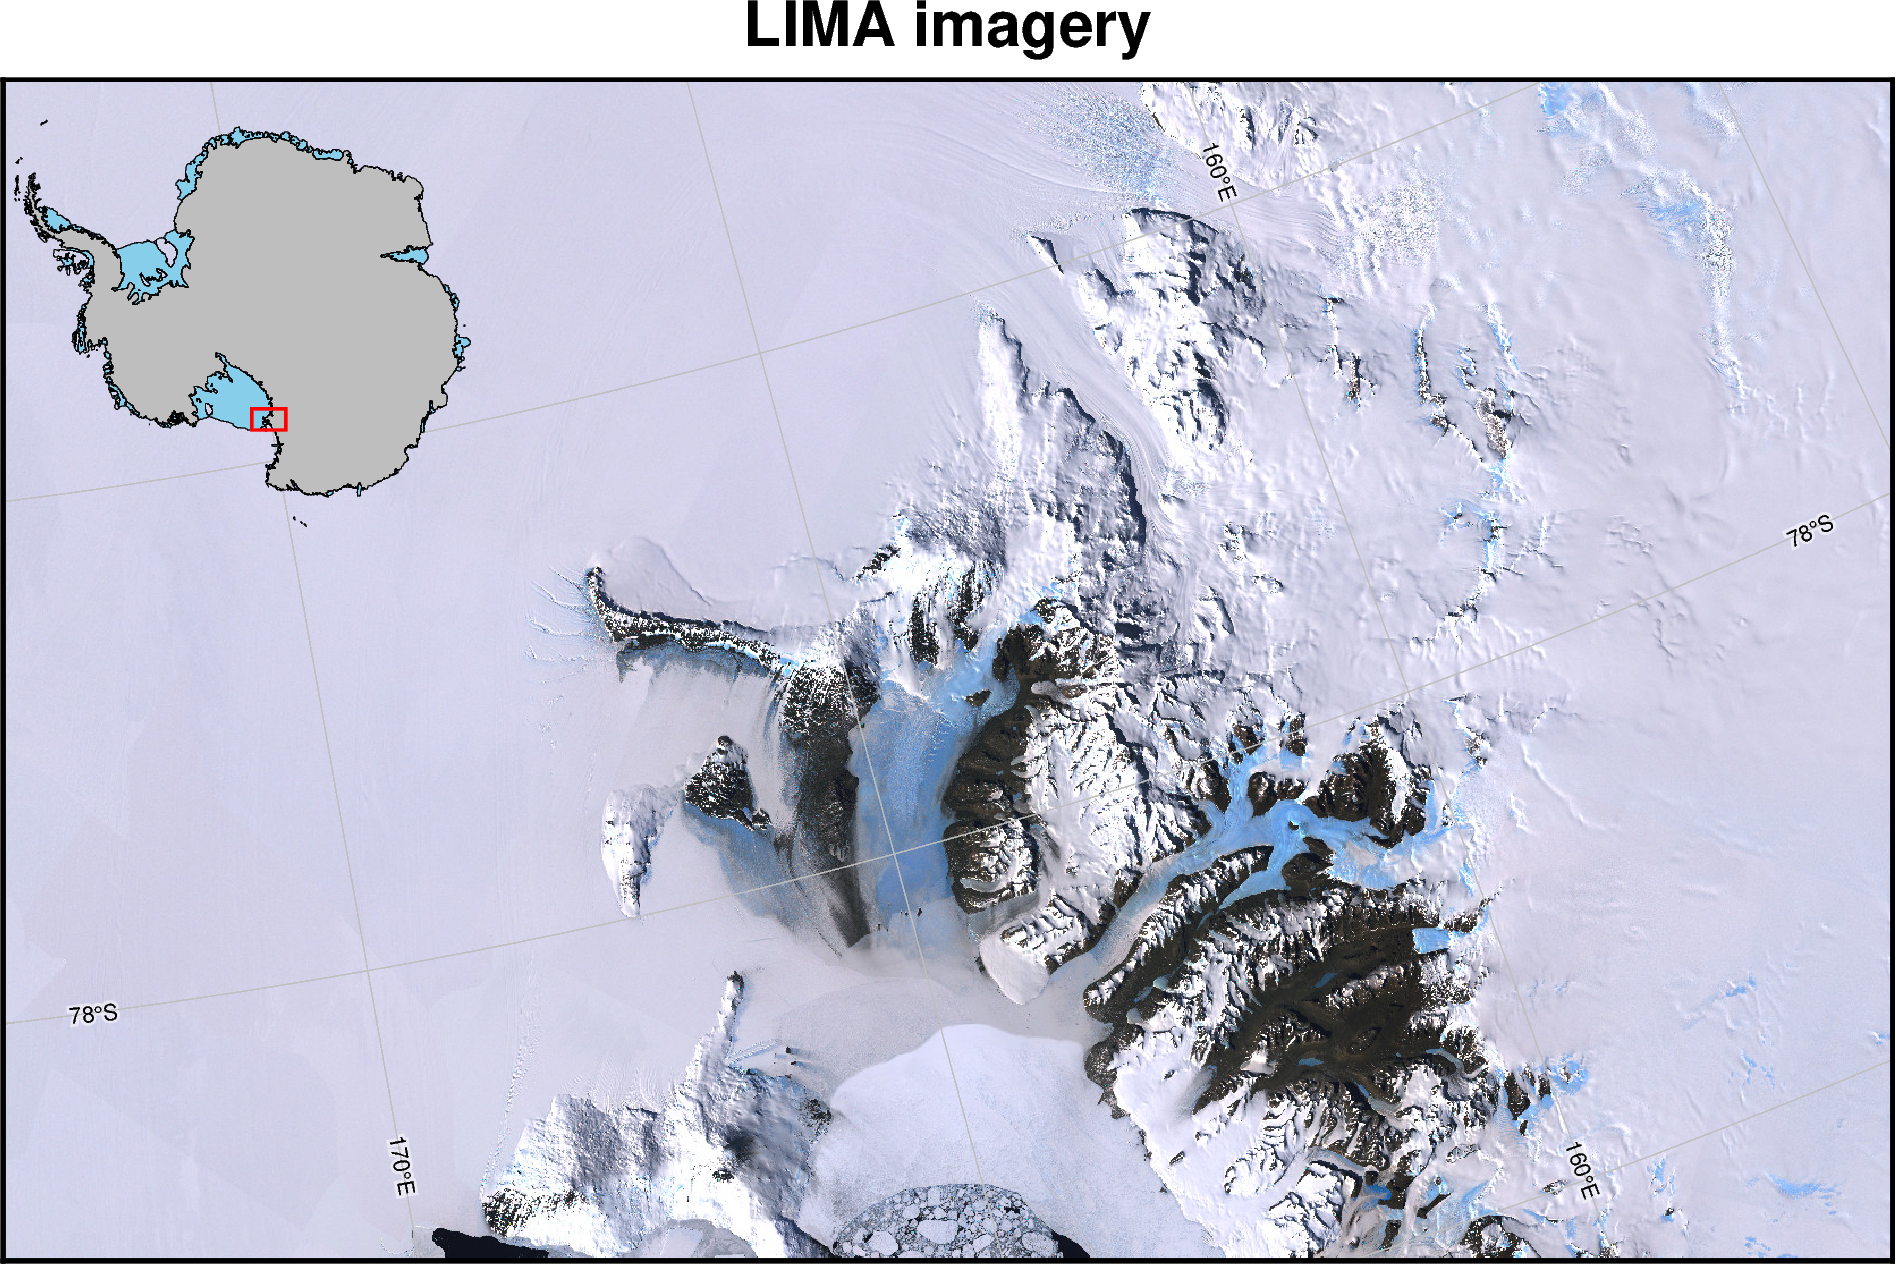

In [3]:
# define the region of interest
region = (150e3, 550e3, -1350e3, -1100e3)

# plot the imagery and some additional map features
fig = maps.plot_grd(
    imagery,  # GMT automatically recognizes that this is imagery and sets colorscale
    region=region,
    inset=True,
    title="LIMA imagery",
    gridlines=True,
    x_spacing=5,  # plot 10 degree longitude lines
    y_spacing=1,  # plot 2 degree latitude lines
    colorbar=False,
    hemisphere="south",
)

fig.show(dpi=200)

Use additional PyGMT plotting methods on the figure

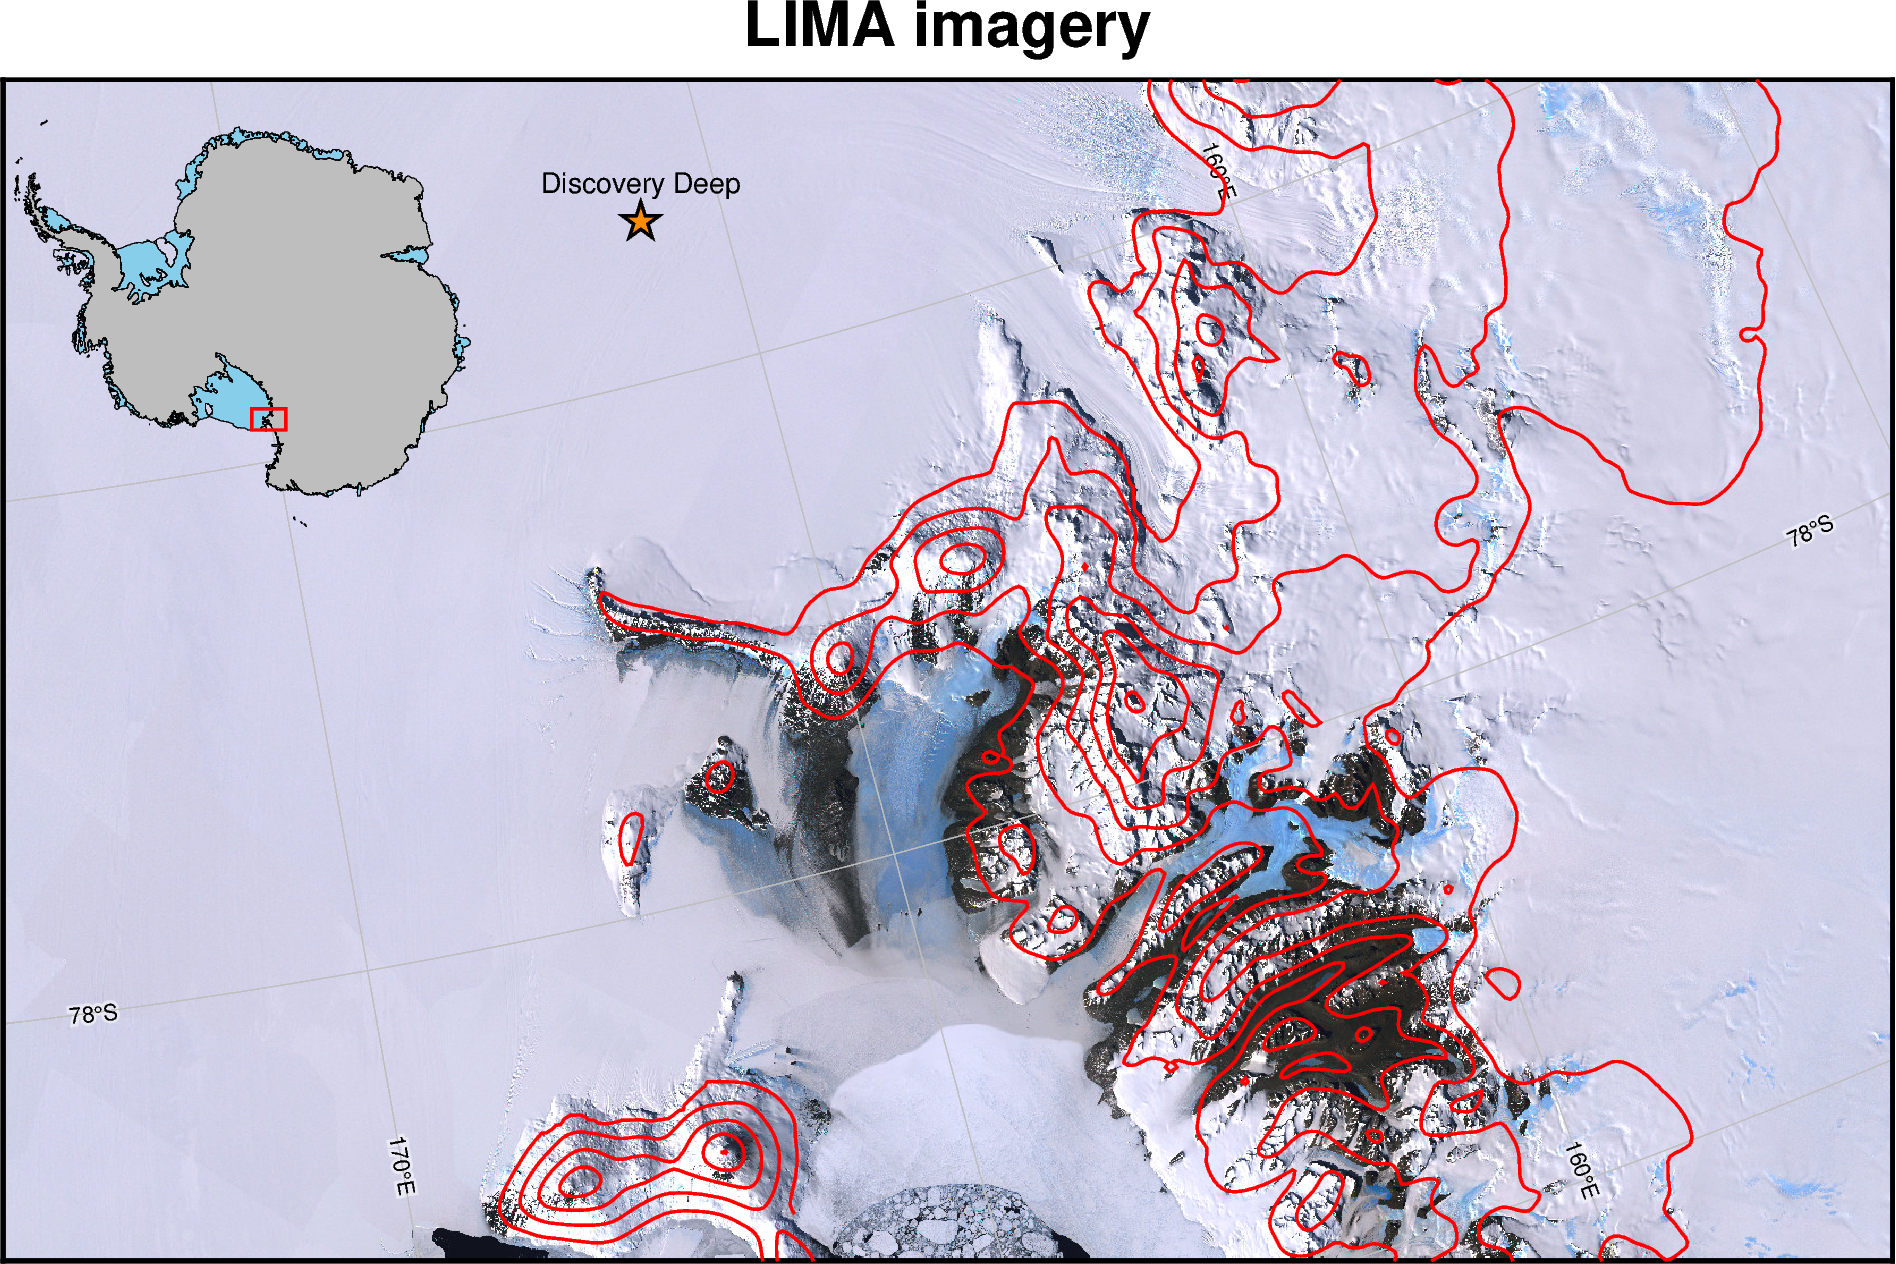

In [4]:
# add surface elevation contours
fig.grdcontour(grid=surface, levels=500, pen="thick,red")

# add a point and label
fig.plot(x=285000, y=-1130000, style="a0.5c", pen="1p,black", fill="darkorange")
fig.text(x=285000, y=-1130000, text="Discovery Deep", offset="0c/.5c")

# show the figure
fig.show(dpi=200)